In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.tree import DecisionTreeClassifier,export_graphviz,plot_tree
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings ("ignore")
import math

In [2]:
# !pip install graphviz

In [3]:
titanic = pd.read_csv('titanic3.csv')
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
titanic.shape

(1309, 14)

In [5]:
#Substitute missing values with average values and convert qualitative variable to quantitative
X_values= titanic[['pclass','sex','age']]
Y = titanic['survived']
X_values['age'].fillna(value=X_values['age'].mean(), inplace=True)
X_values.isna().sum()
sex_label=LabelEncoder()
X_values['sex']=sex_label.fit_transform(X_values['sex'])


In [6]:
#Fit model

XT= X_values[['pclass','sex','age']]
YT = titanic['survived']
feature_names = XT.columns.to_list()
class_names = YT.to_list().sort(reverse=False)


treeclassifier = DecisionTreeClassifier()
model = treeclassifier.fit(XT,YT)

In [7]:
# plt.figure(figsize=(50,25))
# tree.plot_tree(treeclassifier,fontsize=20,feature_names=feature_names,class_names=class_names)

In [8]:
import graphviz
dot_data = export_graphviz(model)
graph = graphviz.Source(dot_data, format="png") 


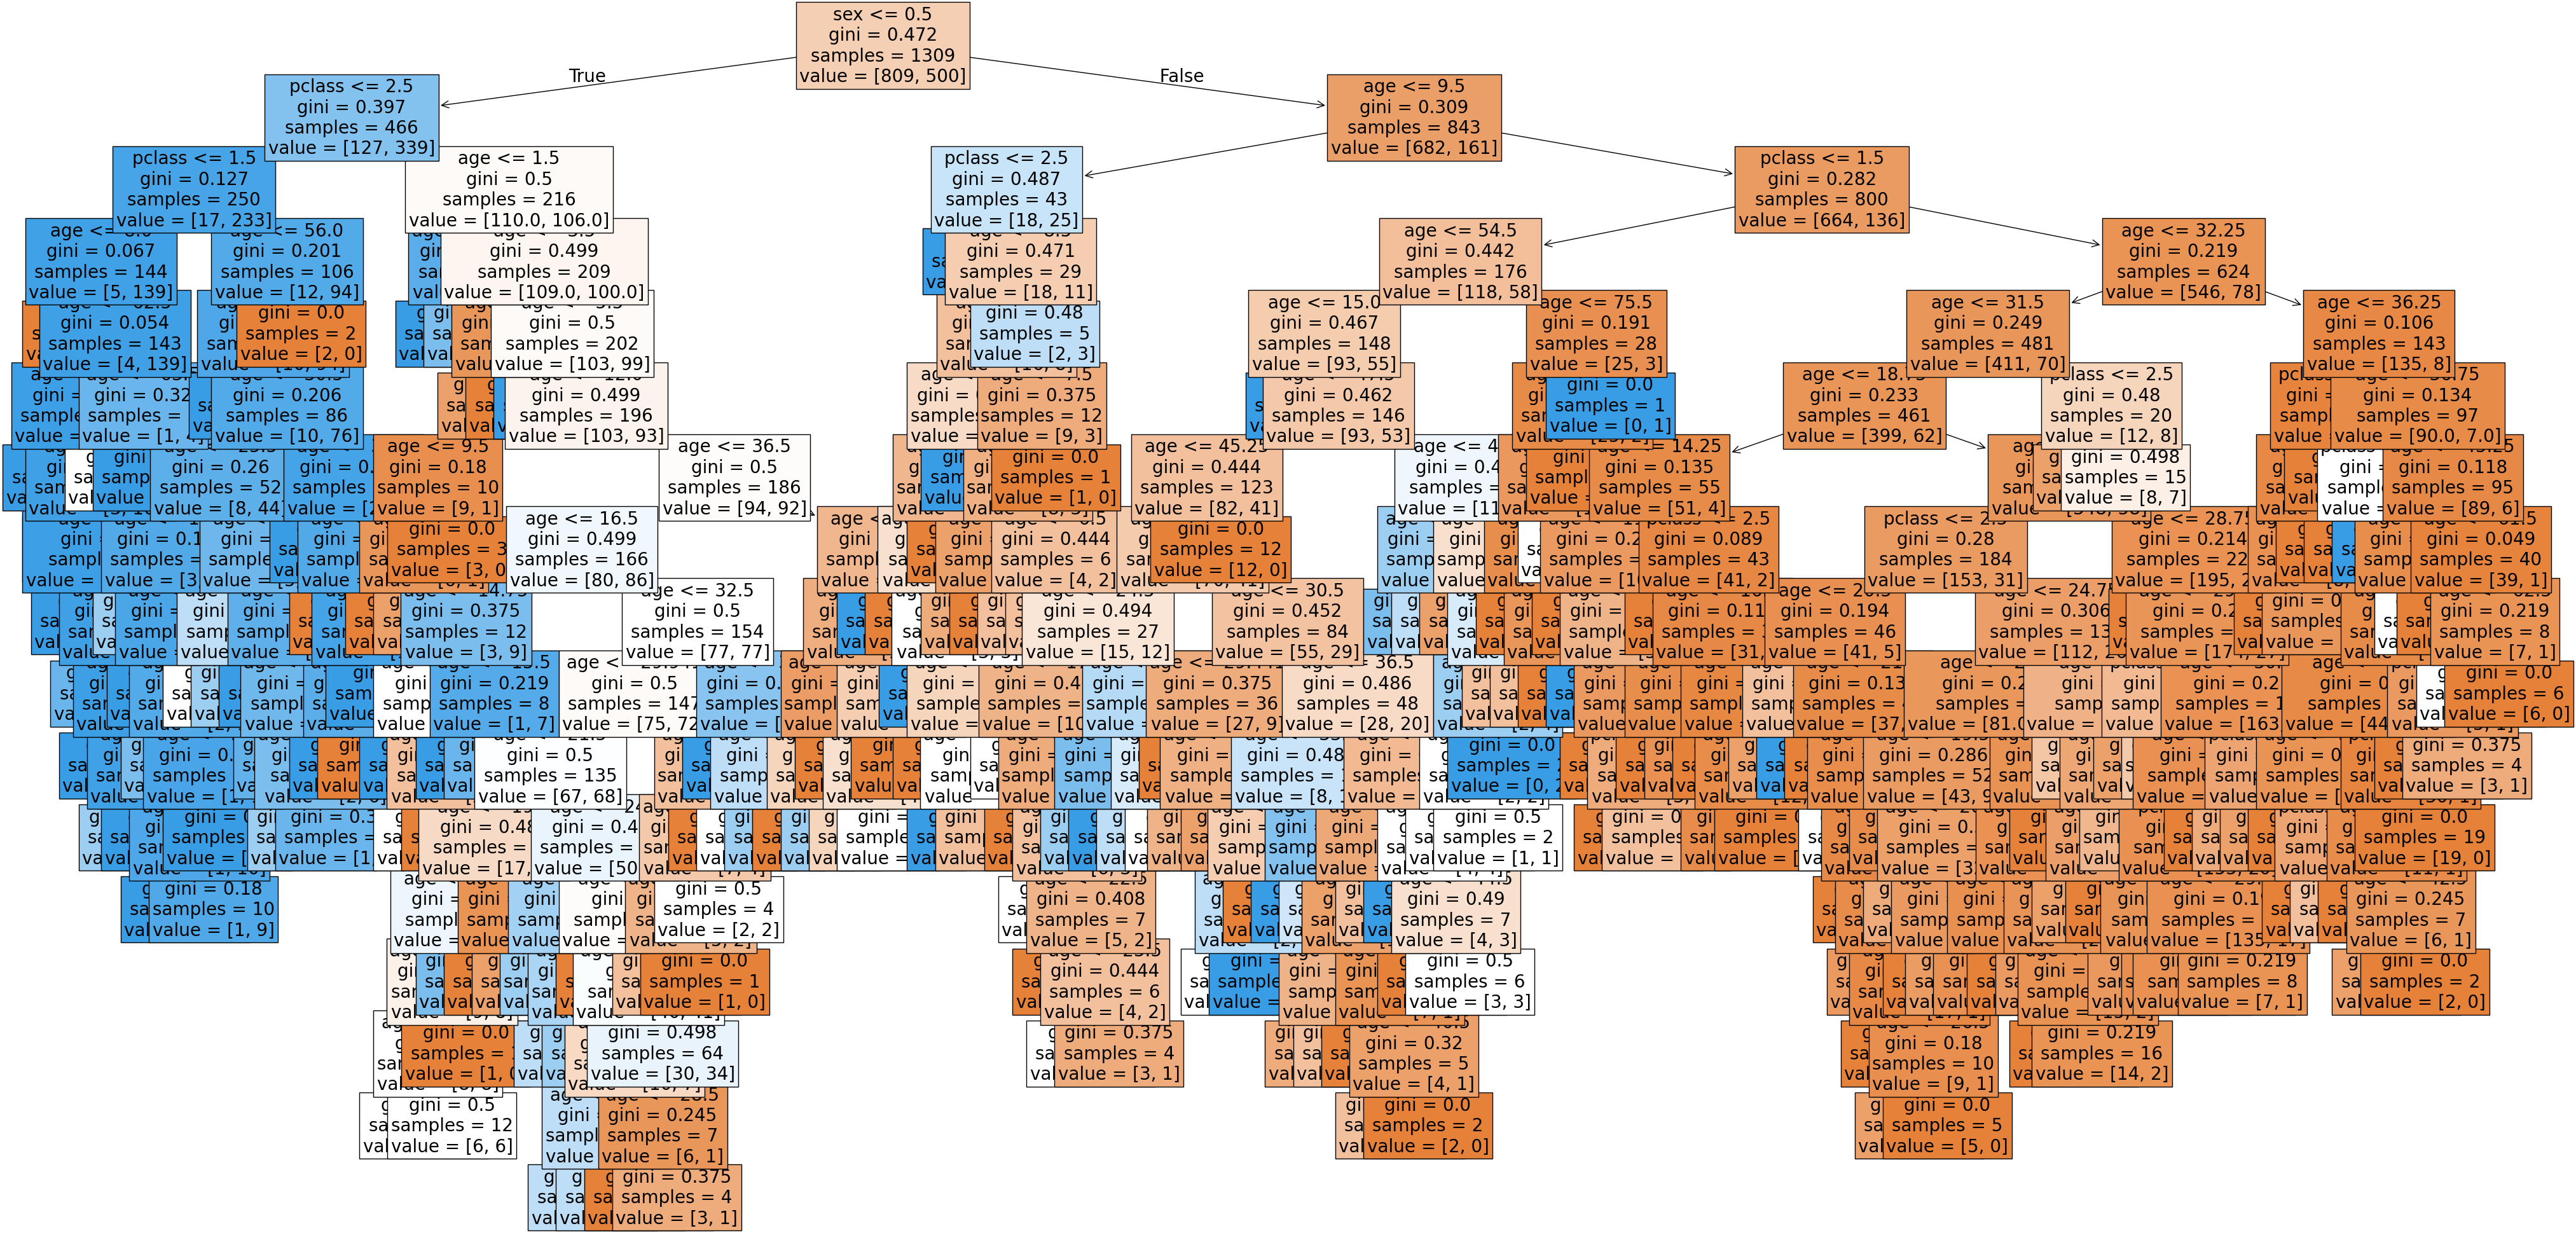

In [9]:
#Tree
plt.figure(figsize=(50,25))
plot_tree(model,filled=True,fontsize=20,feature_names=feature_names,class_names=class_names)
plt.savefig("Unpruned_tree.png") 
plt.show()

In [10]:
#Performance evaluation accuracy
KF = KFold(n_splits=10, random_state=42, shuffle=True)
scores = cross_val_score(model, XT, YT,scoring = 'accuracy',cv=KF)
print(f'The accuracy is :{np.mean(scores)*100}%')

The accuracy is :77.00293599530241%


In [11]:
#Performance evaluation Error
KF = KFold(n_splits=10, random_state=42, shuffle=True)
Error = cross_val_score(model, XT, YT,scoring='neg_mean_squared_error',cv=KF)
print(f'Error is: {np.mean(np.absolute(Error)*100)}%')






Error is: 22.997064004697588%


In [12]:
#Pruning
path = model.cost_complexity_pruning_path(XT, YT)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    models.append(model)
models
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
search = GridSearchCV(models,param_grid)


Text(0, 0.5, 'Accuracy scores')

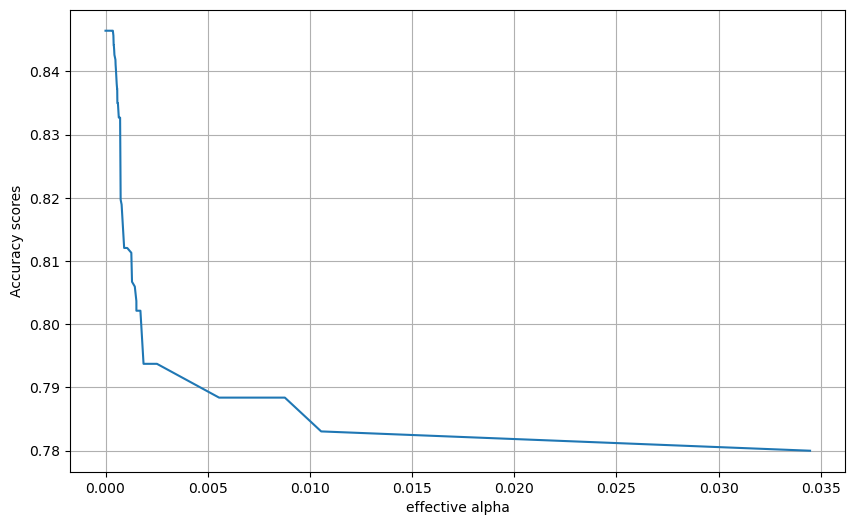

In [13]:
#Pruning
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(XT, YT)
    clfs.append(clf)

acc_scores = [accuracy_score(YT, clf.predict(XT)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

In [14]:
pruning = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
Pruned_model = pruning.fit(XT, YT)

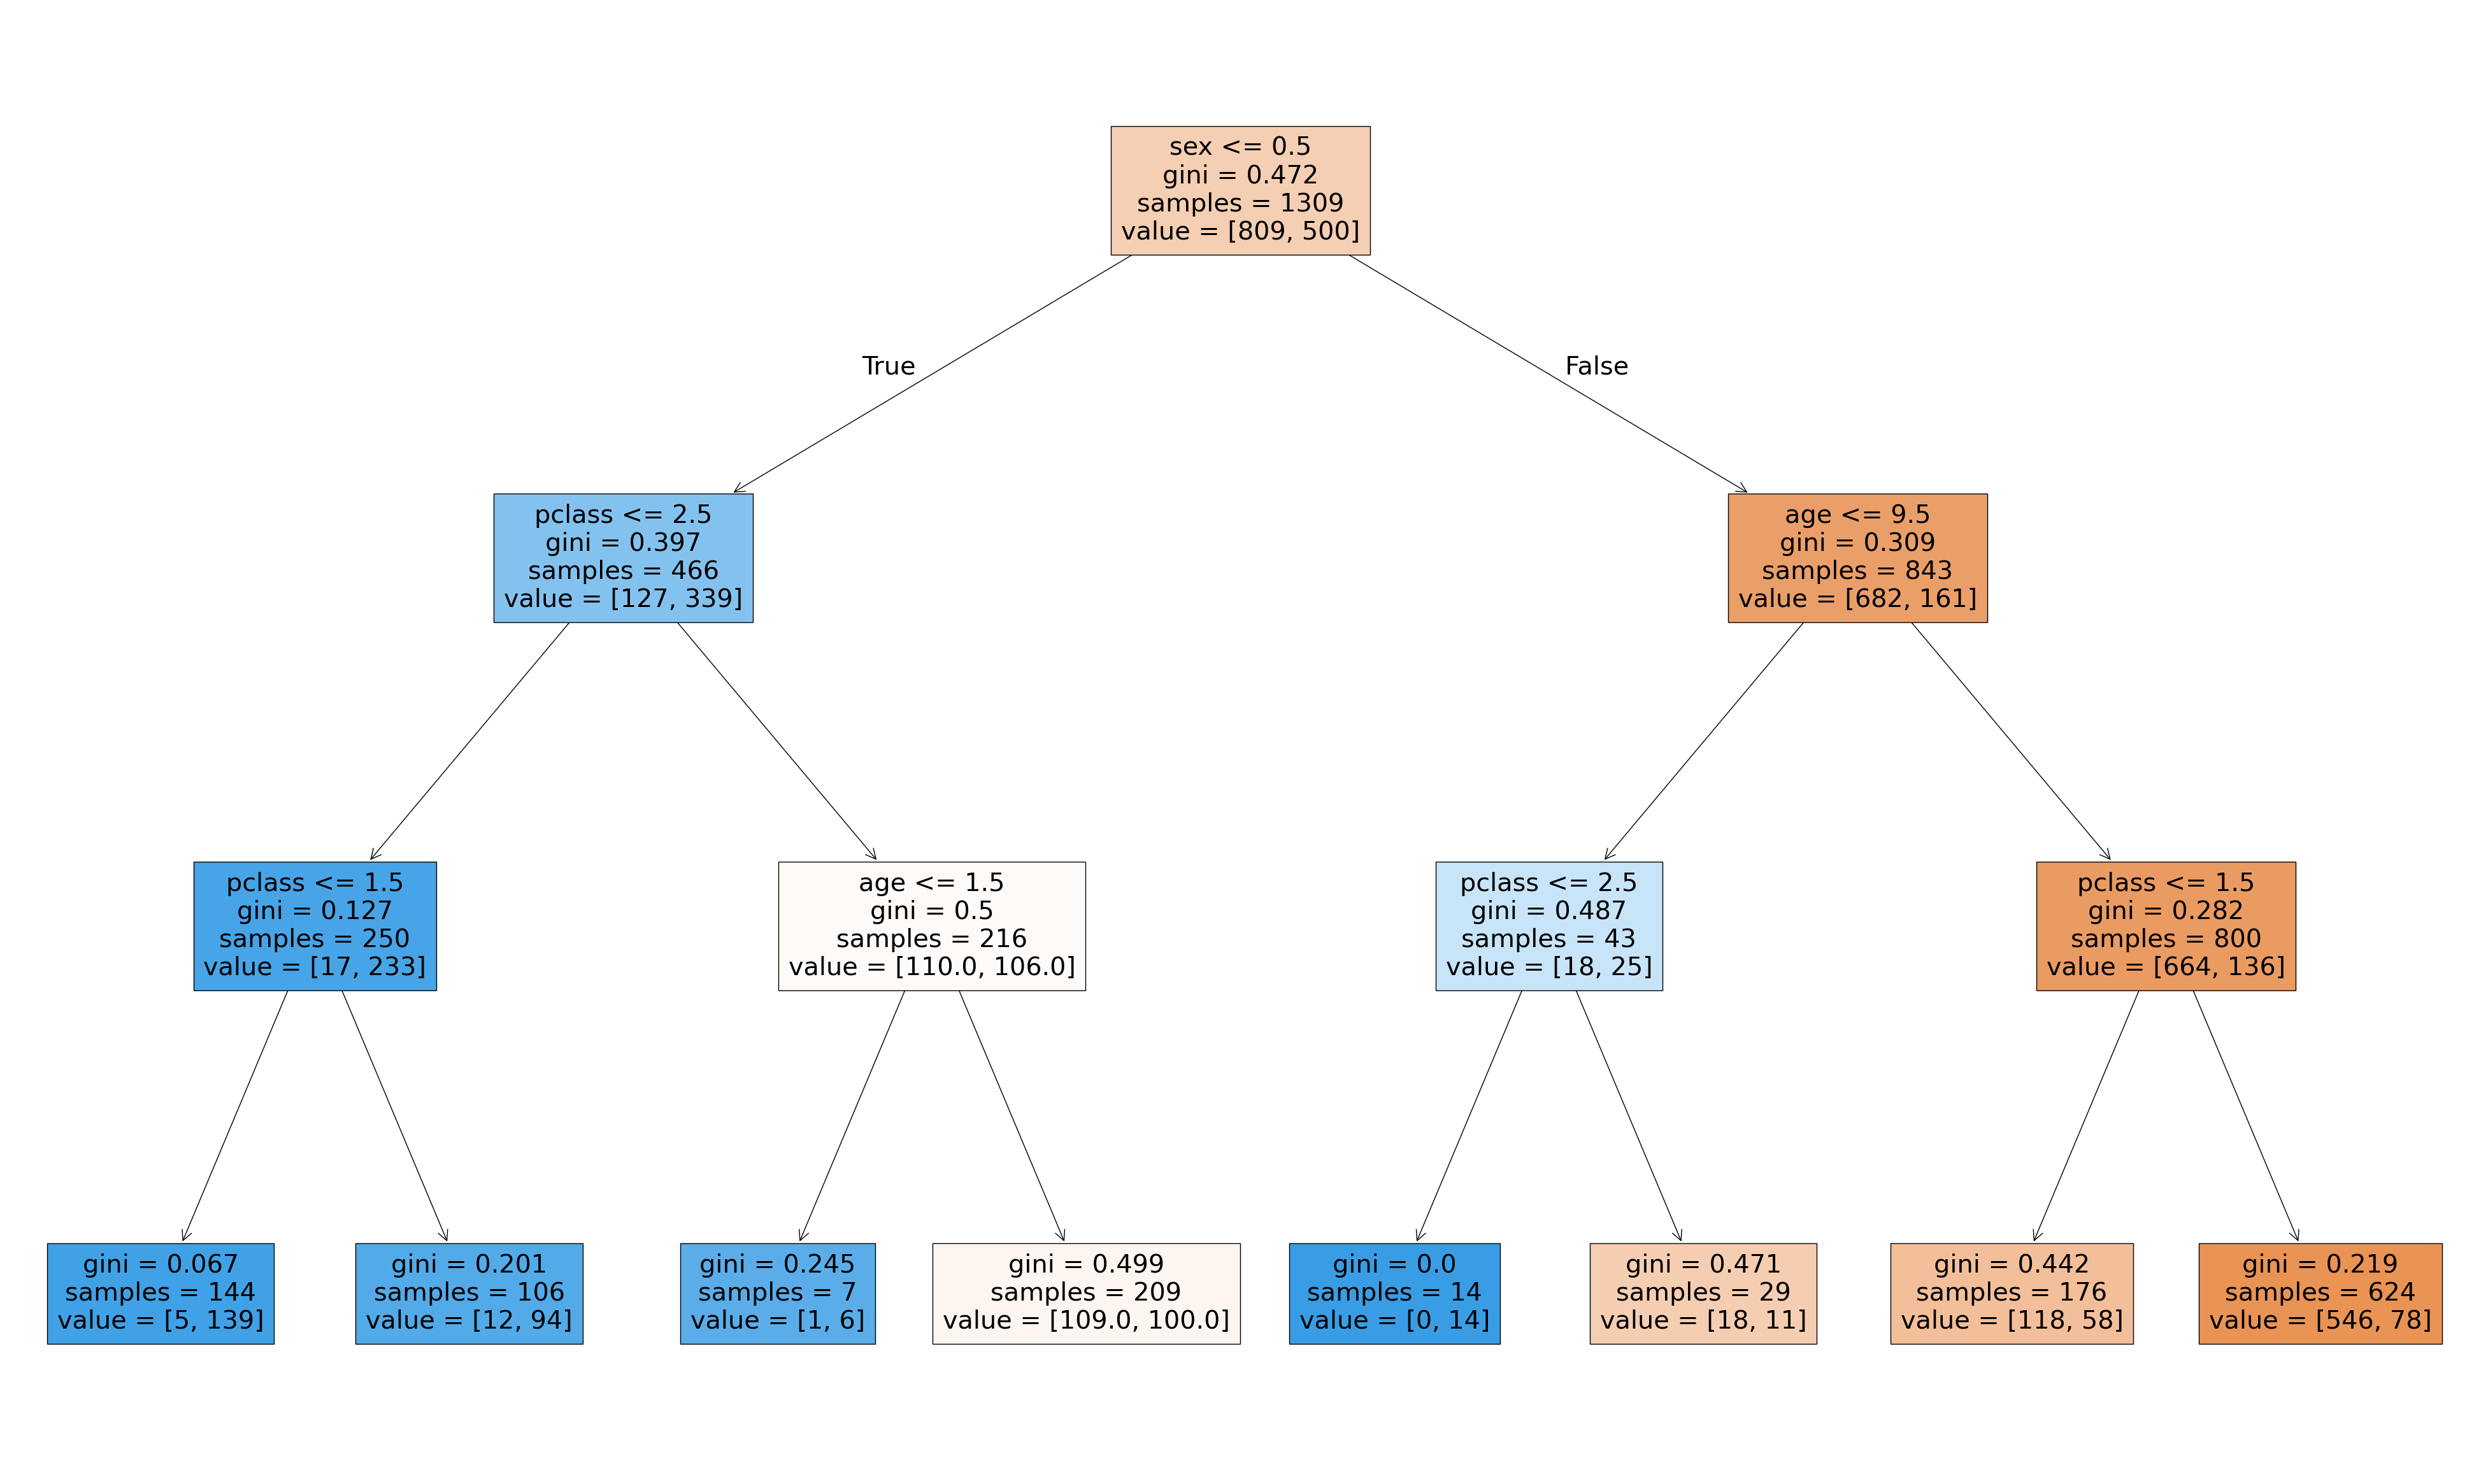

In [15]:
# Tree after pruning
plt.figure(figsize=(50,30))
plot_tree(Pruned_model,filled=True,feature_names=feature_names,class_names=class_names)
plt.savefig("Pruned_tree.png")
plt.show()

In [16]:
#Performance evaluation accuracy
scores_prunned = cross_val_score(Pruned_model, XT, YT,scoring = 'accuracy',cv=KF)
print(f'The accuracy of prunned model is :{np.mean(scores_prunned)*100}%')

The accuracy of prunned model is :77.6893716970053%
